<a href="https://colab.research.google.com/github/bharaththolikonda/DS/blob/main/Decision_Tree_for_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.**


In [1]:
from google.colab import files
upload=files.upload()


Saving Company_Data.csv to Company_Data.csv


In [2]:

import numpy as np
import pandas as pd
df=pd.read_csv("Company_Data.csv")
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
list(df)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [4]:
median_sales=df["Sales"].median()
df["Sales"] = ["High" if value > median_sales
               else "Low" for value in df["Sales"]]
df["Sales"]

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [5]:

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
column_to_encoder=["ShelveLoc","Urban","US","Sales"]
for column in column_to_encoder:
  df[column]=LE.fit_transform(df[column])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [6]:
X=df.iloc[:,1:]
Y=df["Sales"]



In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)


In [20]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion='poisson',max_depth=7)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)


In [21]:
DT.tree_.max_depth
DT.tree_.node_count


53

In [22]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train,Y_pred_train)
print("Mean squared error: ", mse.round(3))


Mean squared error:  0.087


In [23]:
import numpy as np
print("Root Mean squared error: ", np.sqrt(mse).round(3))

Root Mean squared error:  0.295


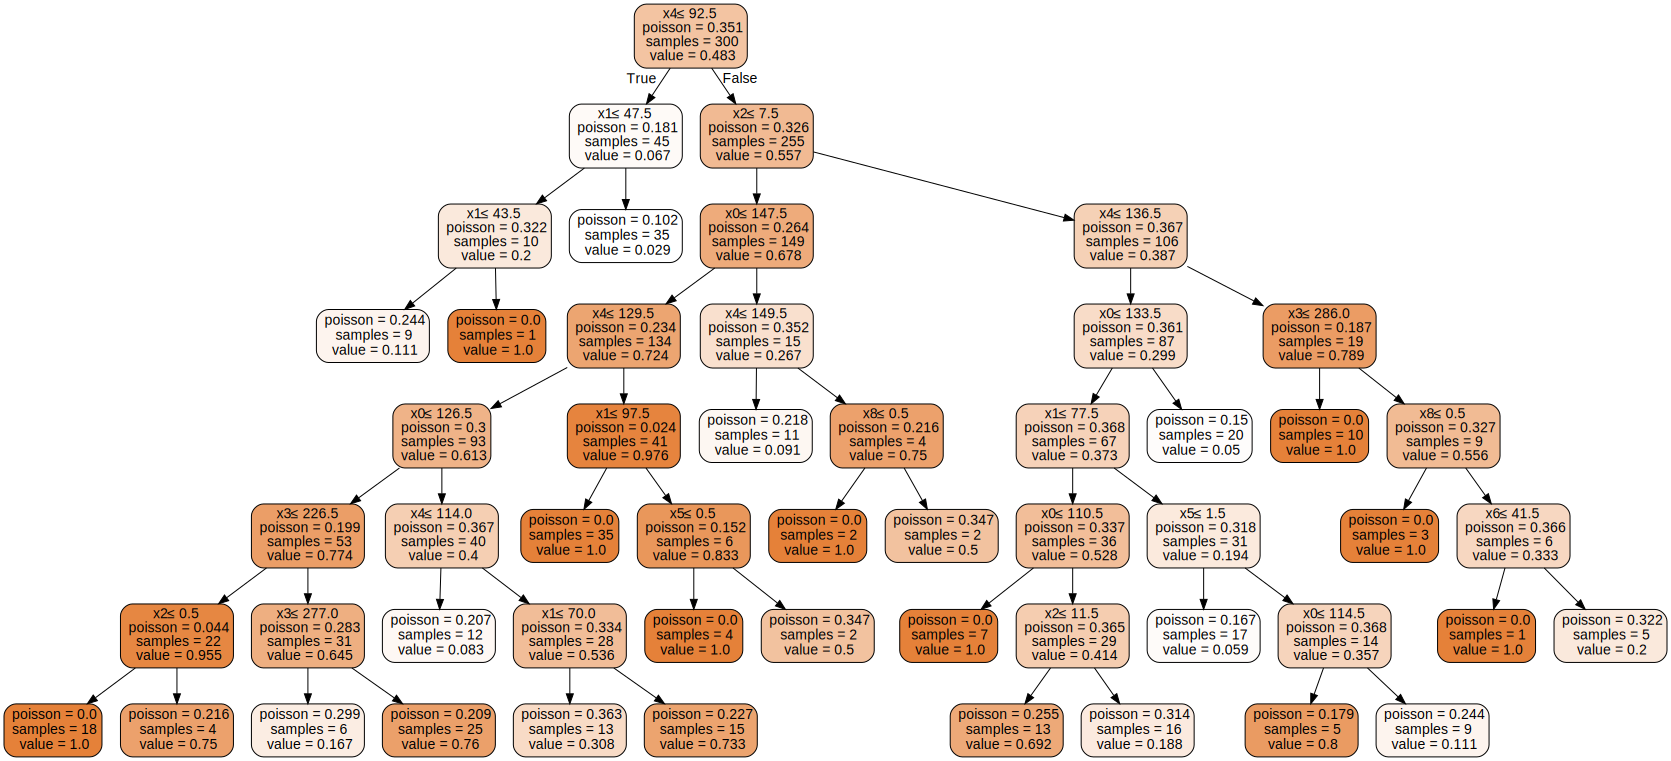

In [24]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DT,filled=True, rounded=True,
                    special_characters=True)
graph = graphviz.Source(dot_data)
graph